In [1]:
import pandas as pd
import numpy as np
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
plt.style.use('fivethirtyeight')

pio.renderers.default = 'browser'

In [2]:
data = pd.read_csv('Data.csv')

data

,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,3,1,2,5,4,2,1,2,1,9,1,6,11,3,48.0,3
1,2,1,2,4,2,2,1,1,1,2,2,3,4,2,22.0,2
2,2,1,1,6,2,2,1,2,1,1,2,2,8,3,37.0,1
3,2,1,1,4,2,2,2,1,3,6,1,2,11,4,57.0,1
4,1,1,1,6,4,2,2,1,1,2,1,8,4,4,52.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,2,1,1,4,2,2,2,3,1,1,1,2,2,3,41.0,1
15996,1,1,1,4,1,2,1,2,1,2,2,5,3,2,17.0,3
15997,2,1,1,6,2,2,1,2,1,2,1,9,9,2,17.0,4
15998,1,1,1,4,1,2,2,2,1,2,1,8,4,3,37.0,4


# Using the attributes that were used in the Kmeans

the attributes are the following: 'Person ID', 'Sex',
                                  'Age', 'Occupation',
                                   'Hours worked per week',  'No of hours'

In [4]:
data_for_clustering = data[['Sex', 'Age', 'Occupation', 'No of hours']]
data_for_clustering.head()

,Sex,Age,Occupation,No of hours
0,2,5,6,48.0
1,2,4,3,22.0
2,1,6,2,37.0
3,1,4,2,57.0
4,1,6,8,52.0


In [5]:
X = np.array(data_for_clustering)
X

array([[ 2.,  5.,  6., 48.],
       [ 2.,  4.,  3., 22.],
       [ 1.,  6.,  2., 37.],
       ...,
       [ 1.,  6.,  9., 17.],
       [ 1.,  4.,  8., 37.],
       [ 2.,  4.,  7., 30.]])

In [6]:
db = DBSCAN(eps=2, min_samples=100).fit(X)
labels = db.labels_


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

unique_labels = set(labels)


Estimated number of clusters: 2
Estimated number of noise points: 1557


In [7]:
data_with_clusters = data
data_with_clusters['Cluster'] = labels
# data_with_clusters

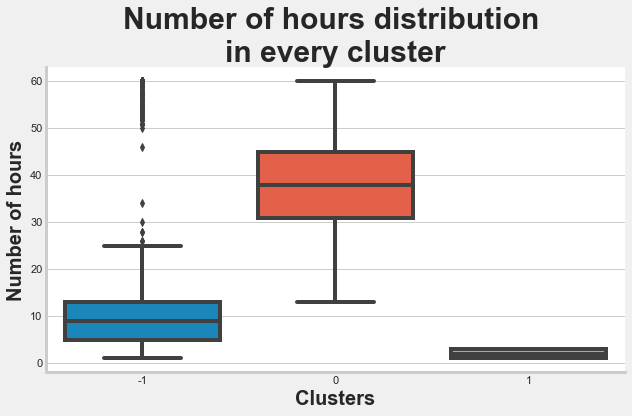

In [8]:
plt.figure(figsize=(9, 6))
sns.set_style('whitegrid')


ax = sns.boxplot(x='Cluster', y='No of hours', data=data_with_clusters)

ax.set_xlabel('Clusters', size=20, fontweight='bold')
ax.set_ylabel('Number of hours', size=20, fontweight='bold')
ax.set_title('Number of hours distribution \nin every cluster', size=30, fontweight='bold')

# Altering the x axis labels values' names
# ax.set_xticklabels(('Noise', 'Cluster 1', 'Cluster 2')) 

plt.setp(ax.get_xticklabels(), size=11)

plt.tight_layout()
sns.despine()

# plt.savefig('2clusters.jpeg')

In [9]:
for i in np.sort(data_with_clusters['Cluster'].unique()):
#     print(i, data_with_clusters[(data_with_clusters['Cluster'] ==i)].shape)
    print(np.sort(data_with_clusters[(data_with_clusters['Cluster'] ==i)]['No of hours'].unique()))
    print((data_with_clusters[(data_with_clusters['Cluster'] ==i)].shape), '\n\n')

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 24. 25. 26. 28. 30. 34. 46. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59.
 60.]
(1557, 17) 


[13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.
 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48.
 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.]
(14334, 17) 


[1. 2. 3.]
(109, 17) 


